<a href="https://colab.research.google.com/github/dantae74/machine-learning/blob/main/codeit/13-03-matrix-factorization-gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 행령 인수분해 경사 하강법 구현

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 체점을 위해 임의성을 사용하는 numpy 도구들의 결과가 일정하게 나오도록 해준다
np.random.seed(5)
RATING_DATA_PATH = 'https://raw.githubusercontent.com/dantae74/machine-learning/main/codeit/datasets/ratings.csv'  # 데이터 파일 경로 정의
# numpy 출력 옵션 설정
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

In [ ]:
def predict(Theta, X):
    """유저 취향과 상품 속성을 곱해서 예측 값을 계산하는 함수"""
    return Theta @ X


def cost(prediction, R):
    """행렬 인수분해 알고리즘의 손실을 계산해주는 함수"""
    return np.nansum((prediction - R)**2)


def initialize(R, num_features):
    """임의로 유저 취향과 상품 속성 행렬들을 만들어주는 함수"""
    num_users, num_items = R.shape
    
    Theta = np.random.rand(num_users, num_features)
    X = np.random.rand(num_features, num_items)
    
    return Theta, X

In [27]:
def gradient_descent(R, Theta, X, iteration, alpha, lambda_):
    """행렬 인수분해 경사 하강 함수"""
    num_user, num_items = R.shape
    num_features = len(X)
    costs = []
        
    for _ in range(iteration):
        prediction = predict(Theta, X)
        error = prediction - R
        costs.append(cost(prediction, R))
                          
        for i in range(num_user):
            for j in range(num_items):
                if not np.isnan(R[i][j]):
                    for k in range(num_features):
                        # 아래 코드를 채워 넣으세요.
                        Theta[i][k] -= alpha * (np.nansum(error[i, :]*X[k, :]) + lambda_*Theta[i][k])
                        X[k][j] -= alpha * (np.nansum(error[:, j]*Theta[:, k]) + lambda_*X[k][j])
                        
    return Theta, X, costs

(array([[-0.32, -0.49,  0.17,  0.44, -1.54],
        [-0.15,  0.84,  1.4 ,  0.56,  0.21],
        [ 0.66,  0.32,  1.33,  0.23,  0.18],
        [-0.68, -0.86, -0.38, -0.06, -0.38],
        [-0.14, -0.41, -0.52, -0.21,  1.48],
        [-0.15,  1.31,  0.72, -0.05,  0.96],
        [ 0.86,  0.49, -0.81,  0.71, -0.25],
        [ 0.76,  1.31, -0.27, -0.62,  0.63],
        [ 0.44,  0.61,  1.05, -1.13, -0.55],
        [-0.62,  0.28,  0.93, -0.27,  0.36],
        [ 0.73, -0.54, -0.16, -0.03,  0.51],
        [-0.53,  0.77, -0.73,  1.68, -0.11],
        [-0.27, -0.39,  0.4 ,  1.16, -0.1 ],
        [ 1.06, -0.9 ,  0.92,  0.08,  0.35],
        [-0.75,  0.73, -0.29,  0.67,  1.16],
        [ 0.26,  0.42, -0.03,  0.39,  1.24],
        [ 0.79, -0.17, -0.87, -0.9 ,  0.87],
        [ 1.23,  0.83, -0.67, -0.71, -1.6 ],
        [-0.92,  1.  ,  0.44, -1.2 ,  0.04],
        [ 1.48,  0.61, -0.1 , -0.18, -0.7 ]]),
 array([[-0.43,  0.47, -2.22,  0.62,  1.22,  0.29, -0.47, -0.56, -0.89,
         -0.12,  0.08,  1.

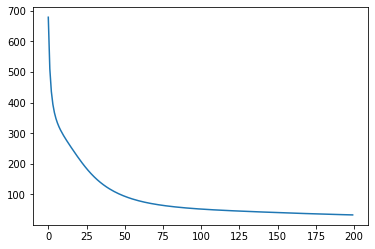

In [29]:
#----------------------실행(채점) 코드----------------------
# 평점 데이터를 가지고 온다
ratings_df = pd.read_csv(RATING_DATA_PATH, index_col='user_id')

# 평점 데이터에 mean normalization을 적용한다
for row in ratings_df.values:
    row -= np.nanmean(row)
       
R = ratings_df.values
        
Theta, X = initialize(R, 5)  # 행렬들 초기화
Theta, X, costs = gradient_descent(R, Theta, X, 200, 0.001, 0.01)  # 경사 하강
    
# 손실이 줄어드는 걸 시각화 하는 코드 (디버깅에 도움이 됨)
plt.plot(costs)

Theta, X